* A pipeline to which you feed an mri image and
 spits out muscle predictions and lever arms.

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from mri_project.custom_imports import *
import mri_project.muscle_detector as md
import mri_project.contour_ops as cntop
from mri_project import pipeline
import mri_project.utility as ut
from mri_project.notebooks import n2021_01_30_connor_lever_arms as nb

In [23]:
root = "/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL W SURVEY/"
connor_images_root = root
files = ut.get_all_images(connor_images_root, extension='jpg')[:10]

In [24]:
# import re
# for file in files:
#     if re.match("^.*\d\d\.jpg$", file):
#         os.unlink(file)

In [29]:
# file = "/home/bzr0014/git/idea_mri_project/data/connor_images/INTERVENTION/CO7B/4-CO7B-14BEH.jpg"
for file in files:
    imgs = nb.compute_lever_arms_for_trace_file(file, angles=(45, 90, 135, 180))
    nb.save_img_dict(
        imgs, 
        ut.replace_path(file, connor_images_root, "../data/connor_lever_arms/CONTROL_W_SURVEY/")
    )

/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL W SURVEY/CO18B/1-CO18B-3BEH.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/1-CO18B-3BEH_45.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/1-CO18B-3BEH_90.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/1-CO18B-3BEH_135.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/1-CO18B-3BEH_180.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL W SURVEY/CO18B/4-CO18B-14BEH.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/4-CO18B-14BEH_45.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/4-CO18B-14BEH_90.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/4-CO18B-14BEH_135.jpg
/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL_W_SURVEY/CO18B/4-CO18B-1

In [28]:
ut.replace_path(file, connor_images_root, "../data/connor_lever_arms/CONTROL W SURVEY/")

'/home/bzr0014/git/idea_mri_project/data/connor_lever_arms/CONTROL W SURVEY/CO18/3-CO18-11BEH.jpg'

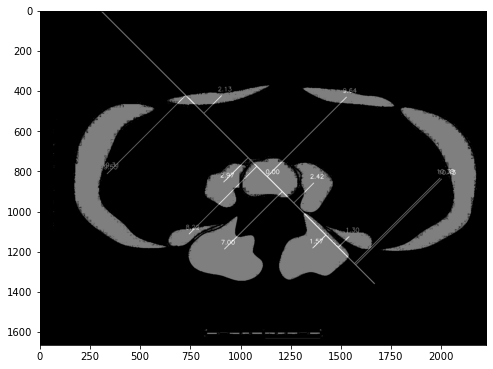

In [8]:
plt.imshow(cv2.imread(file))

# Appendix